In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings


In [2]:
# Suppress warnings and set random seed
warnings.filterwarnings('ignore')
np.random.seed(7)

In [3]:

# Load datasets
train_df = pd.read_csv('/content/mnist_train.csv')
test_df = pd.read_csv('/content/mnist_test.csv')

In [4]:

# Display dataset information
print("Training Data Overview:")
print(train_df.head())
print("\nTraining Data Description:")
print(train_df.describe())
print("\nTesting Data Overview:")
print(test_df.head())
print("\nTesting Data Description:")
print(test_df.describe())

Training Data Overview:
   0  1  2  3  4  5  6  7  8  9  ...  775  776  777  778  779  780  781  782  \
0  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
1  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
2  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
3  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   
4  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0    0   

   783  label  
0    0      5  
1    0      0  
2    0      4  
3    0      1  
4    0      9  

[5 rows x 785 columns]

Training Data Description:
             0        1        2        3        4        5        6        7  \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0

In [5]:

# Separate features and labels
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [6]:
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0


In [7]:

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Naive Bayes': GaussianNB(),
}


In [8]:

# Train and evaluate traditional models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9265
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

Naive Bayes Accuracy: 0.5558
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2

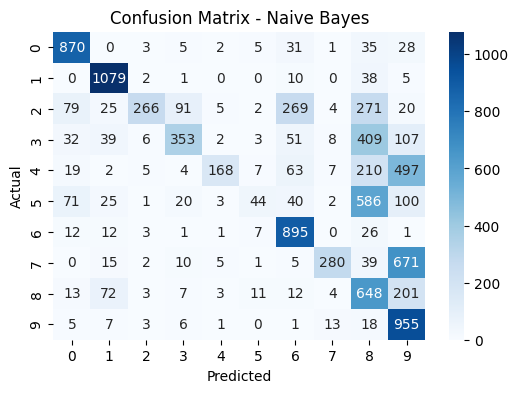

In [10]:
 # Plot confusion matrix
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(6, 4))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
 plt.title(f'Confusion Matrix - {name}')
 plt.xlabel('Predicted')
 plt.ylabel('Actual')
 plt.show()

In [11]:
# Neural Network model
dnn = Sequential([
    Flatten(input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [12]:
dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8736 - loss: 0.4357
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9668 - loss: 0.1106
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9782 - loss: 0.0712
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0550
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9864 - loss: 0.0418
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9895 - loss: 0.0305
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9908 - loss: 0.0292
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9923 - loss: 0.0225
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0216
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0190


In [13]:
# Evaluate Neural Network
y_pred_dnn = np.argmax(dnn.predict(X_test), axis=1)
dnn_acc = accuracy_score(y_test, y_pred_dnn)
results['Neural Network'] = dnn_acc
print(f"Neural Network Accuracy: {dnn_acc:.4f}")
print(classification_report(y_test, y_pred_dnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Neural Network Accuracy: 0.9747
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.96      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.93      0.98      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



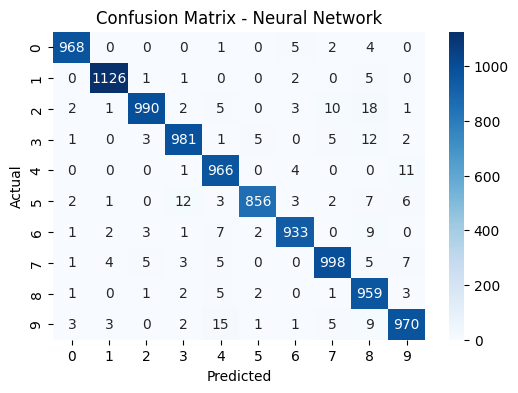

In [14]:
# Plot confusion matrix for Neural Network
cm_dnn = confusion_matrix(y_test, y_pred_dnn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dnn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


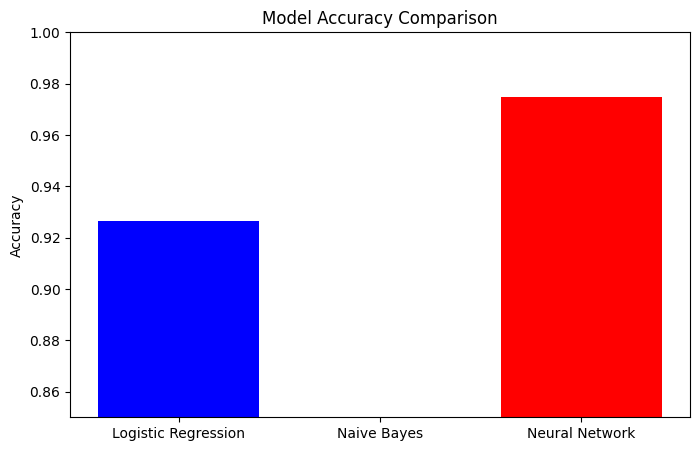

In [15]:
# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.85, 1.0)
plt.show()
